In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import fiona
import os
from scipy.stats import gaussian_kde


In [15]:
geo = pd.read_csv(r'/Users/eykin/Desktop/Eddie Documentsls/projects/Chronic_disease_capstone/data/cdi_cleaned_add_latlong.csv')



C:\Users\eykin\AppData\Local\Temp\ipykernel_26628\2721436772.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  geo = pd.read_csv(r'/Users/eykin/Desktop/Eddie Documentsls/projects/Chronic_disease_capstone/data/cdi_cleaned_add_latlong.csv')


In [16]:
geo.dtypes

Unnamed: 0                     int64
YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValue                     object
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
StratificationCategory1       object
Stratification1               object
GeoLocation                   object
ResponseID                   float64
LocationID                     int64
TopicID                       object
QuestionID                    object
DataValueTypeID               object
StratificationCategoryID1     object
StratificationID1             object
longitude                    float64
latitude                     float64
dtype: object

In [17]:
#geo.drop(['Unnamed: 0'],axis = 1, inplace=True)
geo.head()


,Unnamed: 0,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueUnit,DataValue,...,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,longitude,latitude
0,0,2010,2010,OR,Oregon,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,30,...,POINT (-120.15503132599969 44.56744942400047),NaN,41,CVD,CVD1_4,NMBR,RACE,AIAN,-120.155031,44.567449
1,1,2019,2019,AZ,Arizona,Alcohol,Alcohol use among youth,NaN,%,29.5,...,POINT (-111.76381127699972 34.865970280000454),NaN,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,-111.763811,34.865970
2,2,2019,2019,OH,Ohio,Alcohol,Alcohol use among youth,NaN,%,22.5,...,POINT (-82.40426005599966 40.06021014100048),NaN,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,-82.404260,40.060210
3,3,2019,2019,US,United States,Alcohol,Alcohol use among youth,NaN,%,13.9,...,NaN,NaN,59,ALC,ALC1_1,CRDPREV,RACE,ASN,NaN,NaN
4,4,2015,2015,VI,Virgin Islands,Alcohol,Alcohol use among youth,NaN,%,NaN,...,POINT (-64.896335 18.335765),NaN,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,-64.896335,18.335765


In [18]:
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

In [19]:
us_states = gpd.read_file(r'/Users/eykin/Desktop/Eddie Documentsls/projects/Chronic_disease_capstone/data/States_shapefile.shp')


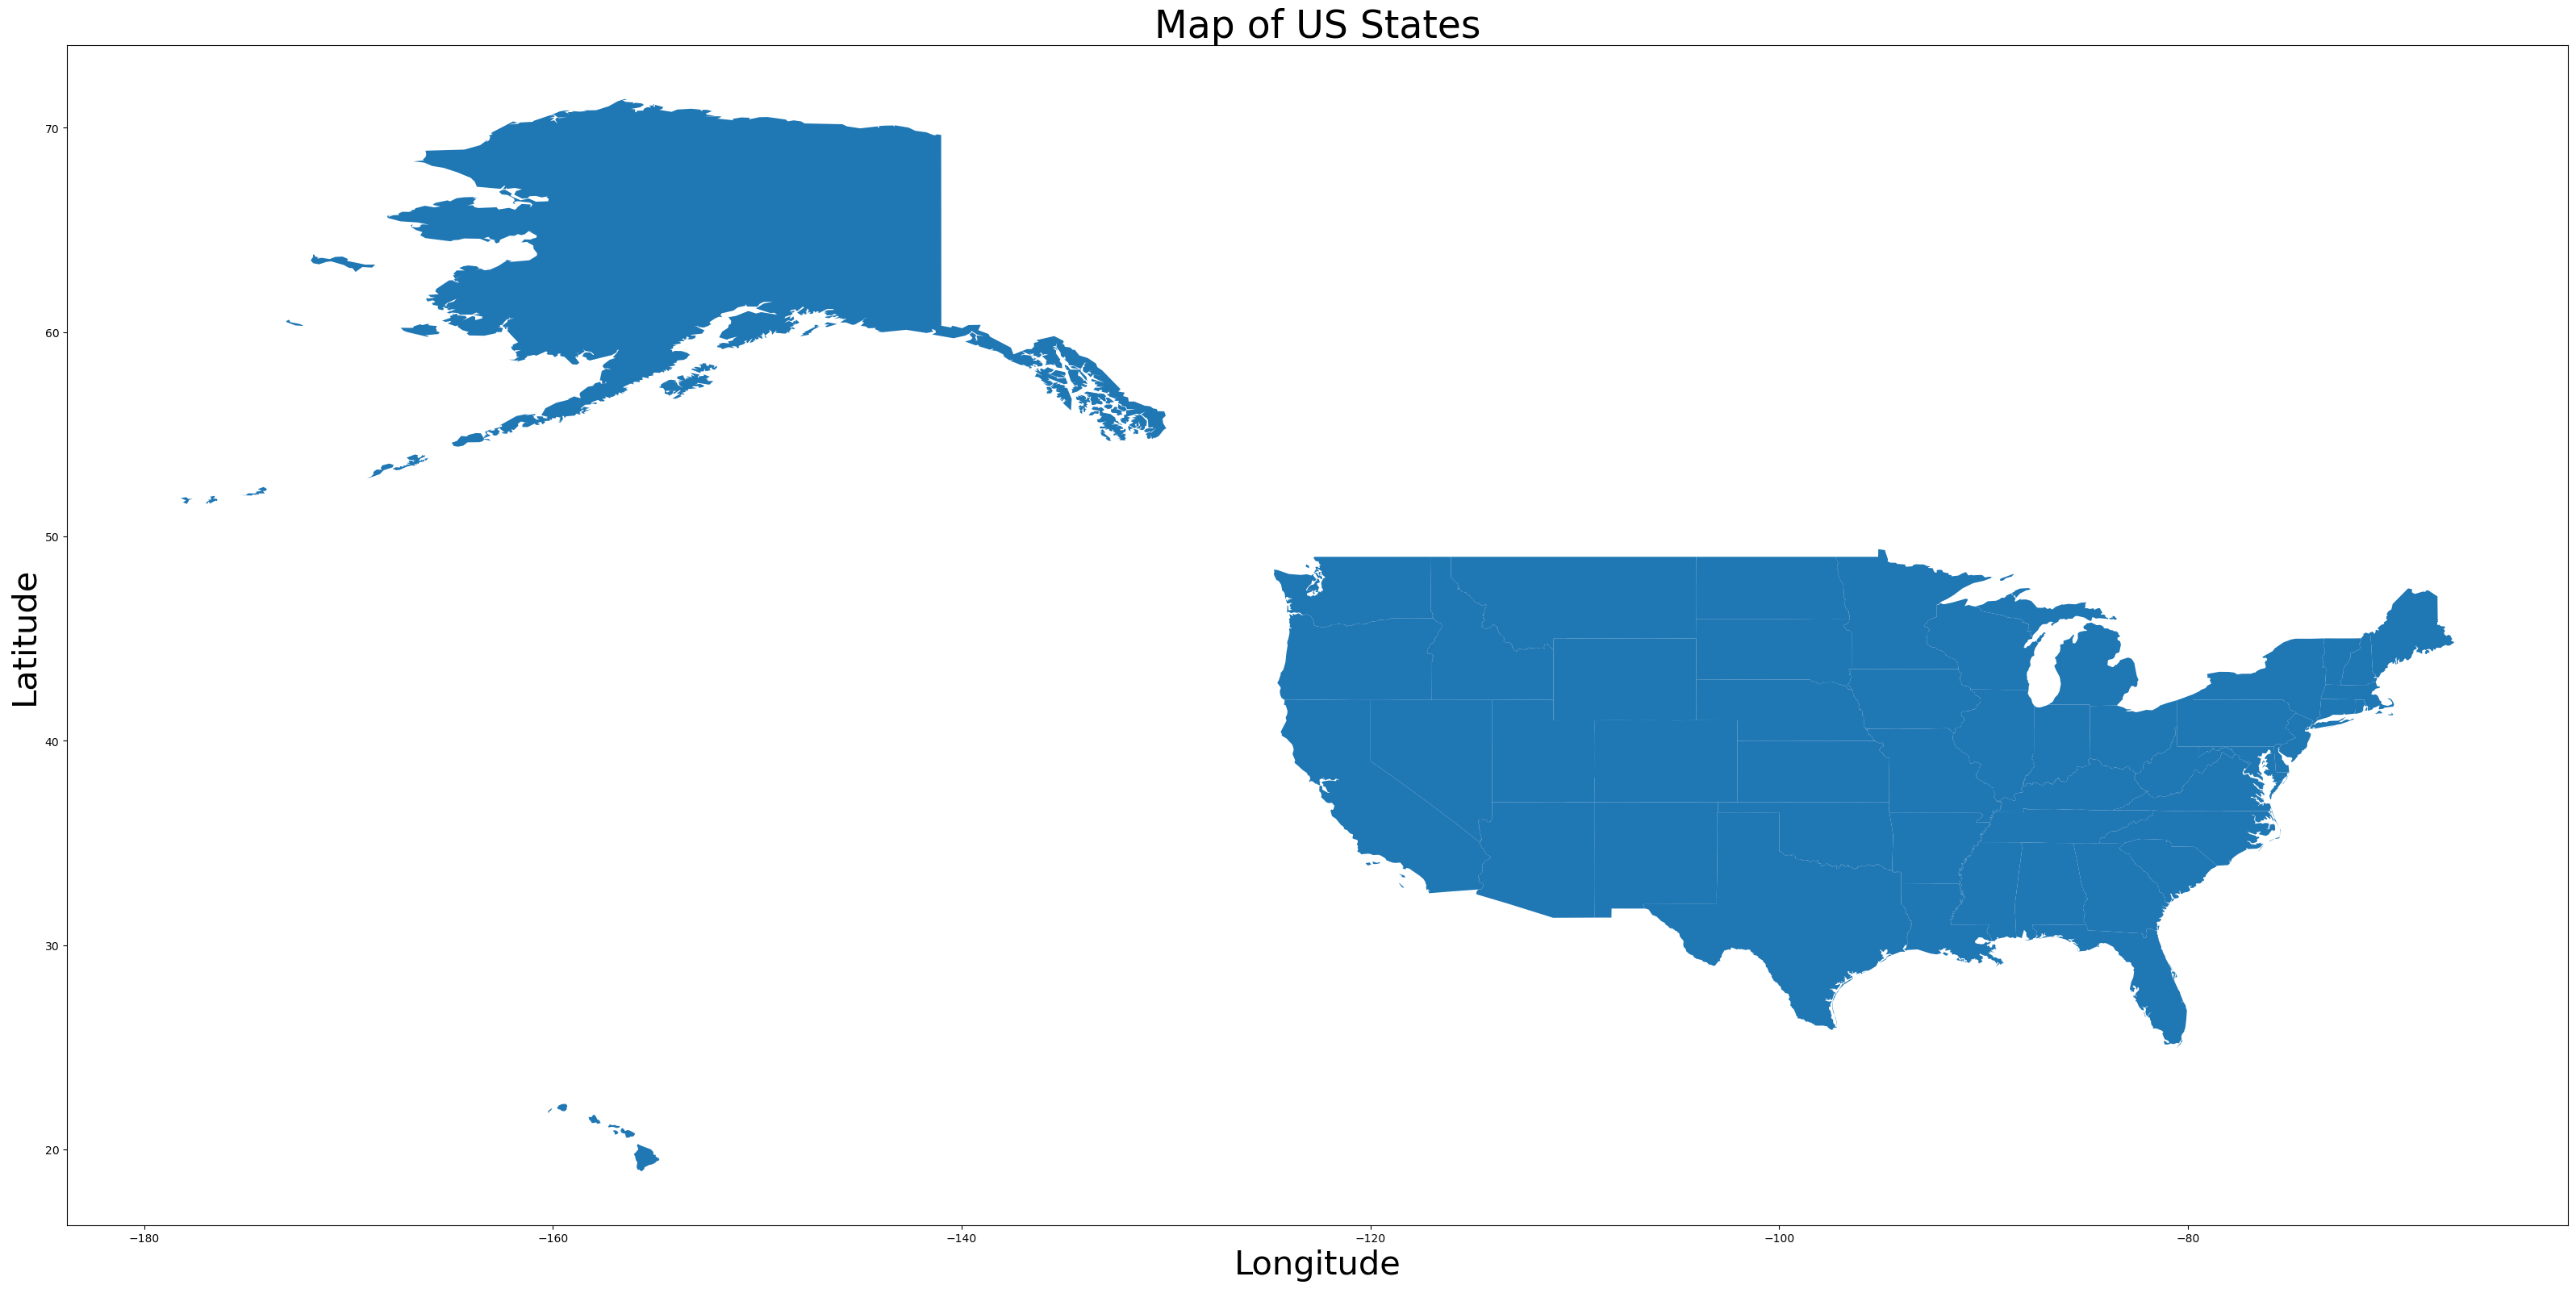

In [20]:
plt.figure(figsize=(40, 32))
ax = plt.gca()
us_states.plot(ax=ax)
ax.set_aspect('equal')
plt.title('Map of US States', fontsize=34)
plt.xlabel('Longitude', fontsize=30)
plt.ylabel('Latitude', fontsize=30)
plt.show()

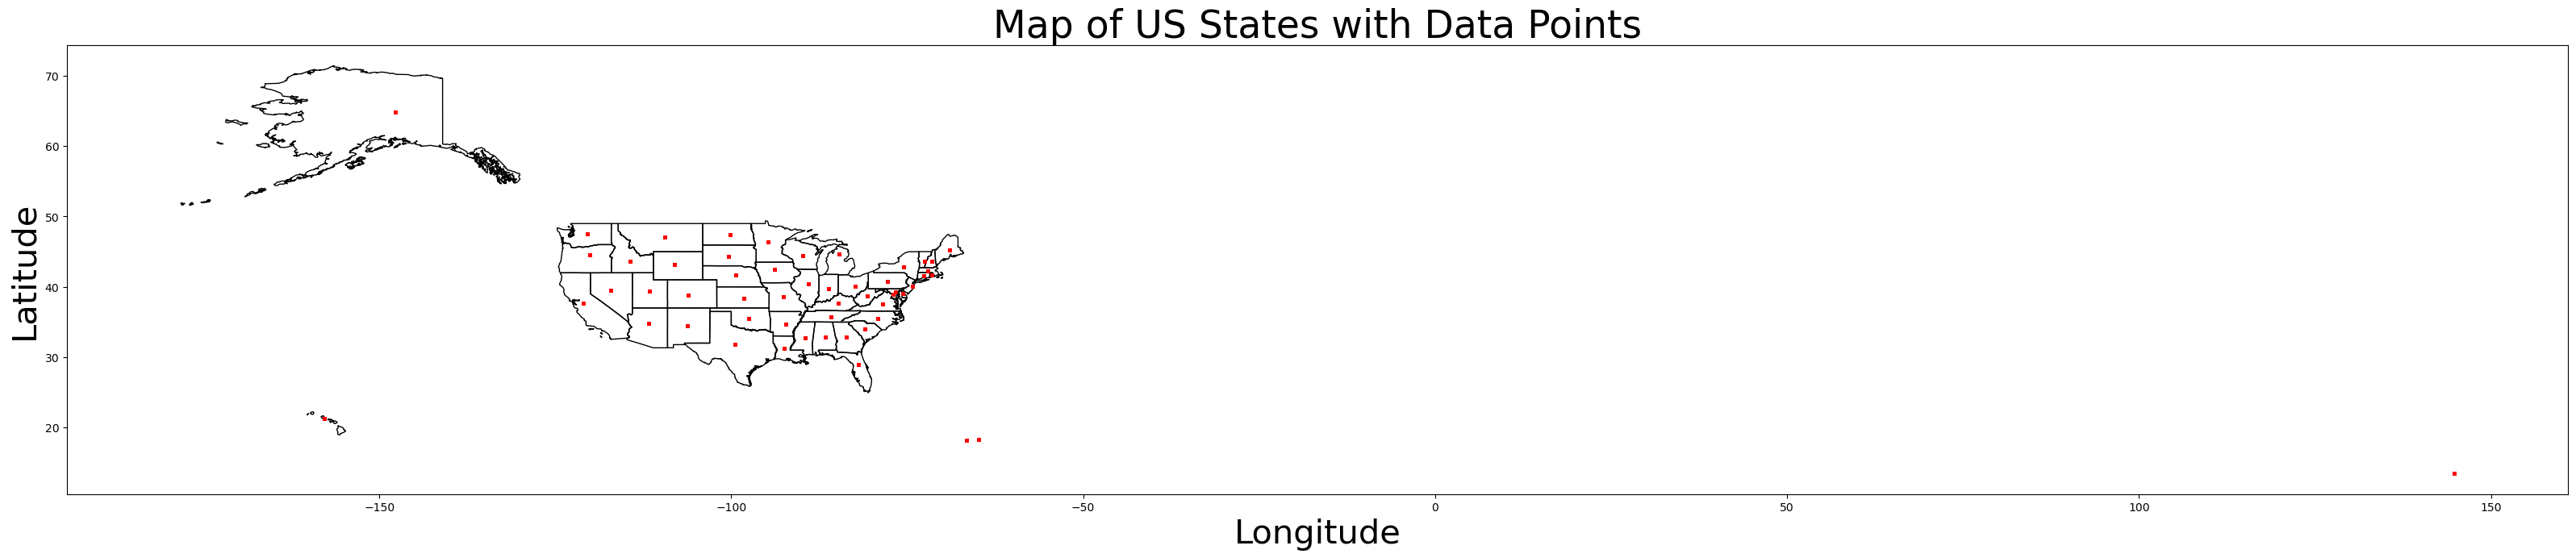

In [21]:
plt.figure(figsize=(40, 32))
ax = plt.gca()
us_states.plot(ax=ax, color='None', edgecolor='black')
geo_gdf = gpd.GeoDataFrame(geo, geometry=gpd.points_from_xy(geo['longitude'], geo['latitude']))
geo_gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5)
plt.title('Map of US States with Data Points', fontsize=34)
plt.xlabel('Longitude', fontsize=30)
plt.ylabel('Latitude', fontsize=30)
ax.set_aspect('equal')
plt.show()

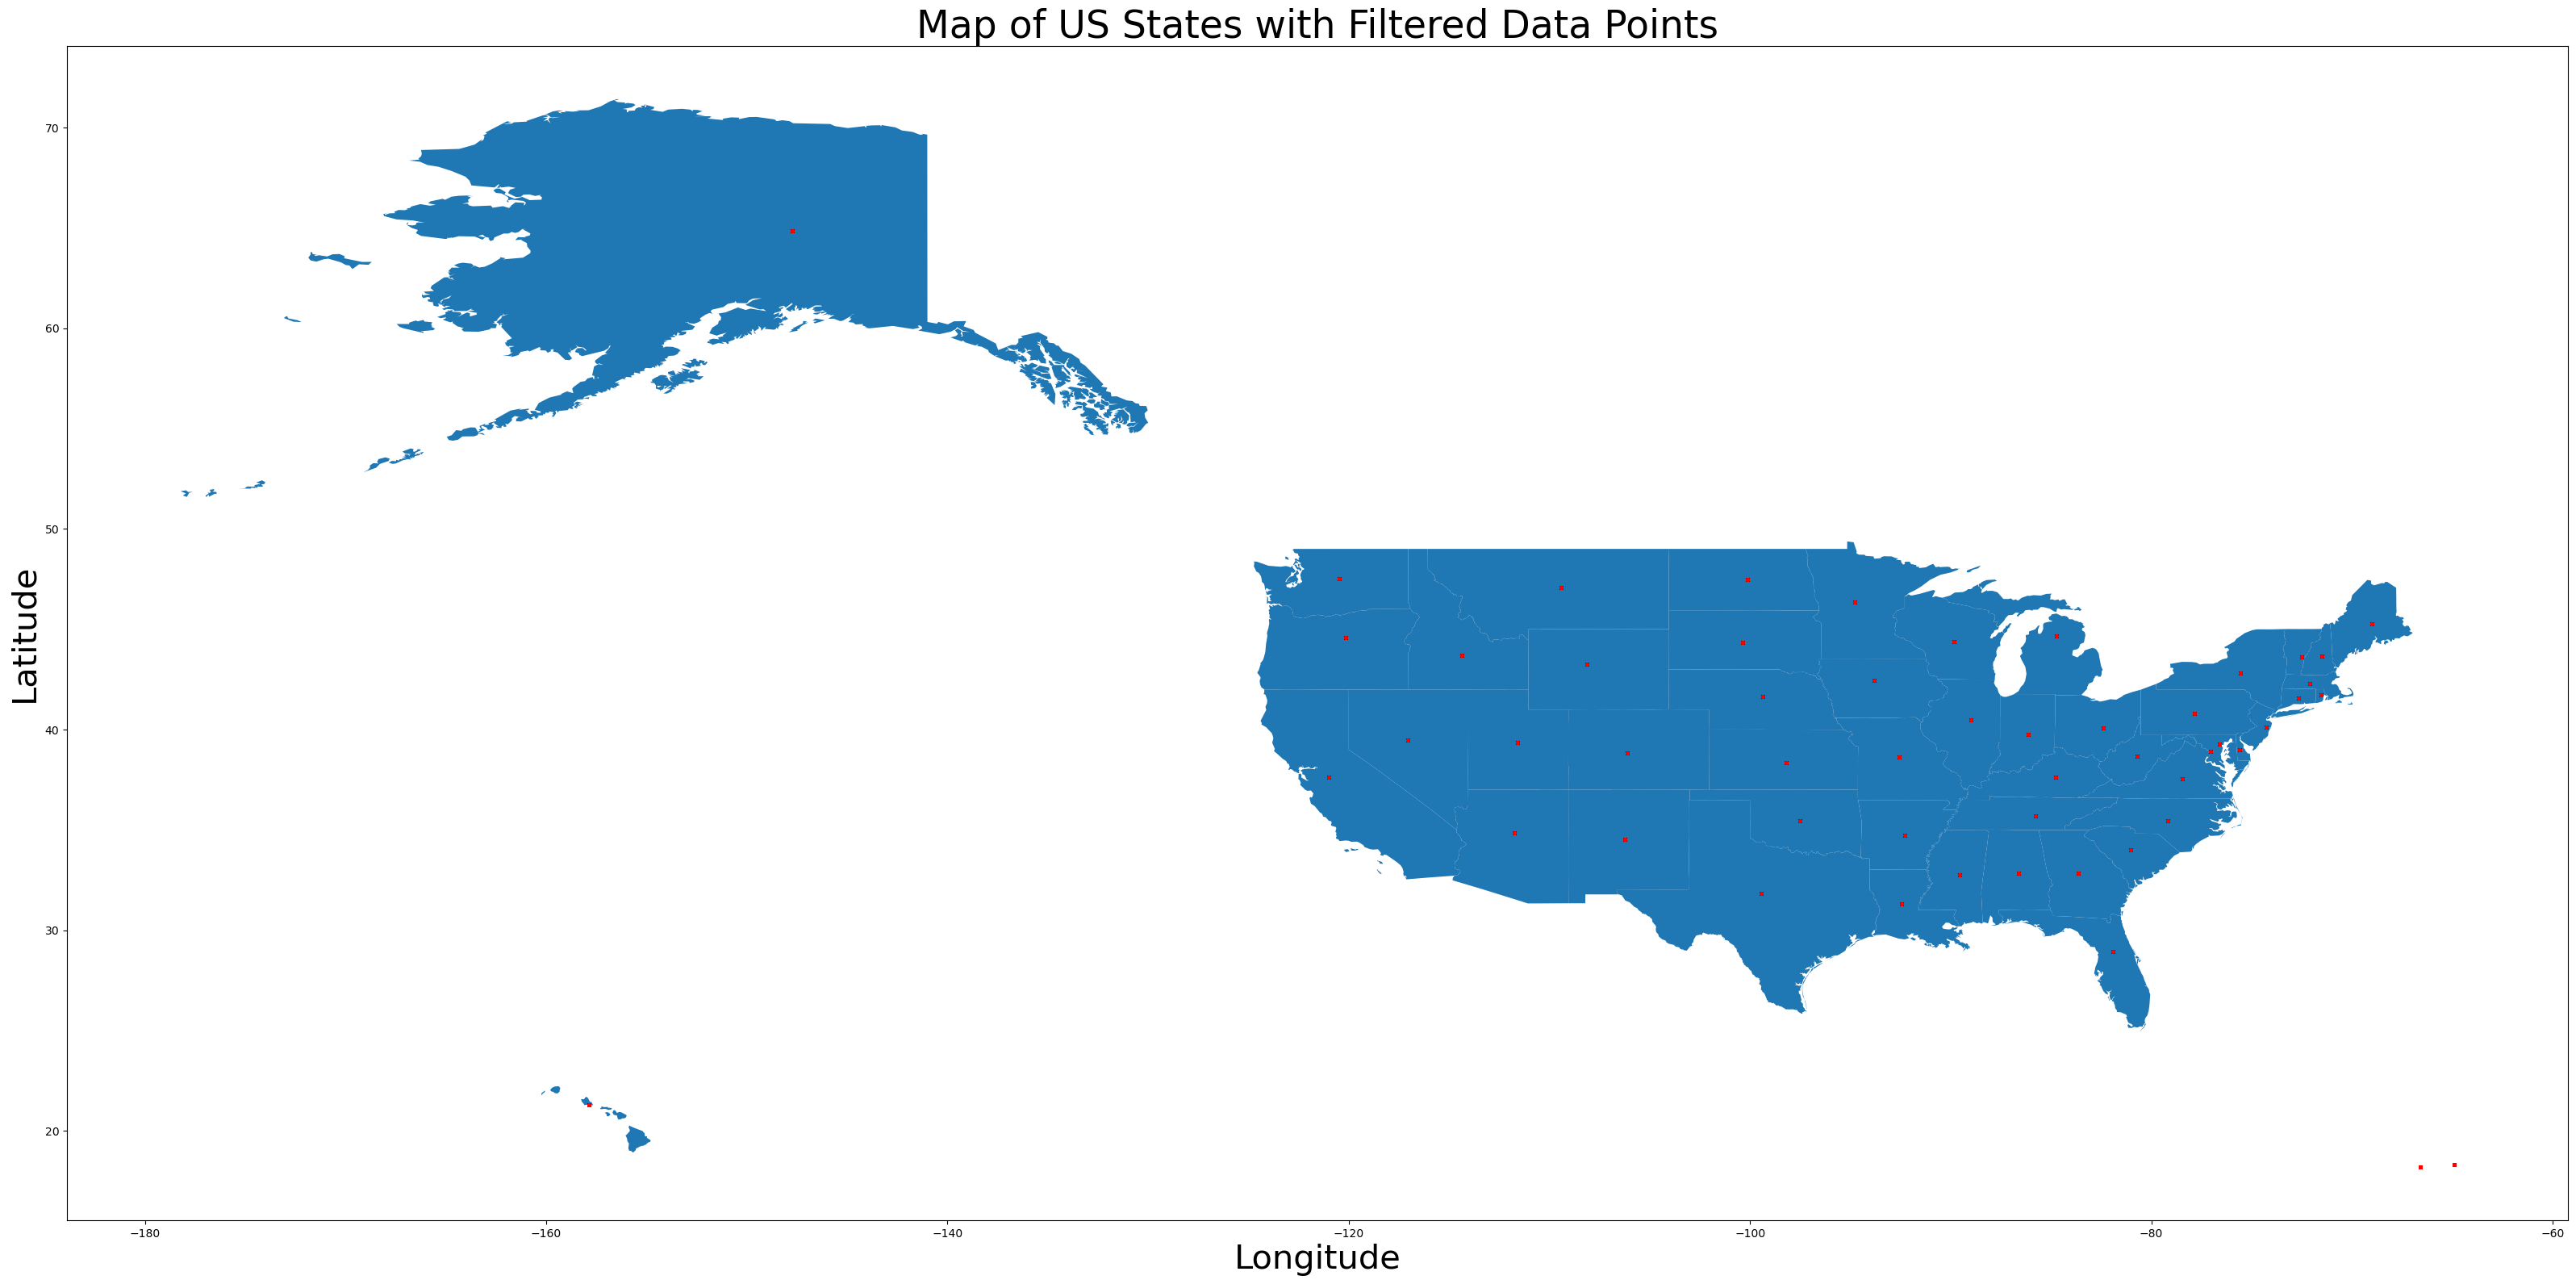

In [22]:

us_bbox = (-170, 17, -40, 72)
filtered_geo = geo[(geo['longitude'] >= us_bbox[0]) & (geo['longitude'] <= us_bbox[2]) &
                   (geo['latitude'] >= us_bbox[1]) & (geo['latitude'] <= us_bbox[3])]
filtered_geo_gdf = gpd.GeoDataFrame(filtered_geo, geometry=gpd.points_from_xy(filtered_geo['longitude'], filtered_geo['latitude']))
plt.figure(figsize=(40, 32))
ax = plt.gca()
us_states.plot(ax=ax)
filtered_geo_gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5)
ax.set_aspect('equal')
plt.title('Map of US States with Filtered Data Points', fontsize=34)
plt.xlabel('Longitude', fontsize=30)
plt.ylabel('Latitude', fontsize=30)
plt.show()

KeyboardInterrupt: 